<a href="https://colab.research.google.com/github/flecumberry/seys/blob/master/seys_SdeF_onda_cuadrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación en Serie de Fourier de una onda cuadrada
Veremos la representación de una cuadrada a con una Serie de Fourier.

Consideramos una señal periódica de período $T$ tal que $$x(t)=\frac{A}{2},\quad0\leq t\leq \frac{T}{2}$$

Coeficientes de la Serie de Fourier según la descomposición de la ec. 3.32 del libro.
B_1 = 0.000
C_1 = -0.318
B_2 = 0.000
C_2 = 0.000
B_3 = 0.000
C_3 = -0.106
B_4 = 0.000
C_4 = 0.000
B_5 = 0.000
C_5 = -0.064


Text(0.5, 1.0, 'Reconstrucción de la función con 5 coeficientes de la SdeF')

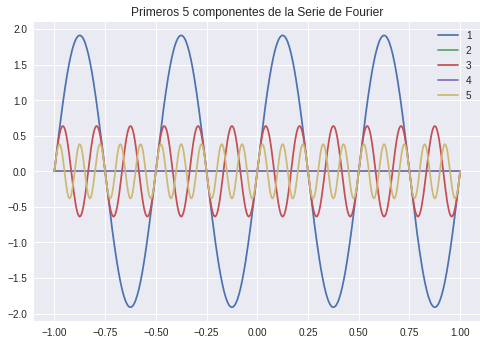

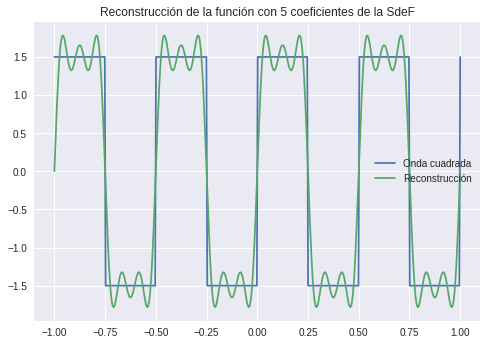

In [3]:
"""

Señales y Sistemas, 2019. IIE-FIng-Udelar.
@author: Federico Lecumberry Gatón García

"""
# Importar funciones necesarias
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# Función a analizar/sintetizar.
# The square wave has a period 2*pi, has value +1 from 0 to 2*pi*duty and -1 
# from 2*pi*duty to 2*pi. duty must be in the interval [0,1].
# =============================================================================
def funcion(t, f, A=1, duty=0.5):
    return 0.5 * A * signal.square(2 * np.pi * f * t, duty)
    
# =============================================================================
# Coeficientes de la función a analizar/sintetizar.
# =============================================================================
def coeficiente_sin(k):
    mod = k % 2
    if mod > 0:
        return -1/(k * np.pi)
    else:
        return 0

def coeficiente_cos(k):
    return 0

# =============================================================================
# Main program.
# =============================================================================
N = 5 # Número de coeficientes a usar.
f = 2 # Frecuencia de la onda cuadrada.
A = 3 # Amplitud de la onda cuadrada.

# Tiempo
n = np.linspace(-1, 1, 500)

# Tren de pulsos
y = funcion( n, f, A )

# Suma de exponenciales. 
# Ver ec.(3.32): x = a0 + 2\sum_{k=1}^N B_k\cos(k\omega_0t) - C_k\sin(k\omega_0t)
a0 = 0
z = a0

print('Coeficientes de la Serie de Fourier según la descomposición de la ec. 3.32 del libro.')
for k in range( 1, N+1 ):
    print('B_%d = %5.3f' % (k, coeficiente_cos(k)))
    print('C_%d = %5.3f' % (k, coeficiente_sin(k)))
    ecos = A * coeficiente_cos(k) * np.cos( k * (2*np.pi*f) * n )
    esin = A * coeficiente_sin(k) * np.sin( k * (2*np.pi*f) * n )
    zn = 2*( ecos - esin )
    z = z + zn
    plt.plot(n, zn, label=k)
    plt.legend()
plt.title('Primeros %d componentes de la Serie de Fourier' % N)
    
plt.figure()
plt.plot(n, y, label='Onda cuadrada')
plt.plot(n, z, label='Reconstrucción')
plt.legend()
plt.title('Reconstrucción de la función con %d coeficientes de la SdeF' % N)

